#### Guess the number 7

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import numpy as np

In [24]:
class AgentState(TypedDict):
  player_name: str
  guesses: list[int]
  attempts: int
  lower_bound: int
  upper_bound: int
  target: int

In [40]:
def setup_node(state: AgentState) -> AgentState:
  """Setup game configs"""
  state['player_name'] = f"Hi, {state['player_name']}"
  state['guesses'] = []
  state['attempts'] = state['attempts']
  state['lower_bound'] = state['lower_bound']
  state['upper_bound'] = state['upper_bound']
  state['target'] = state['target']
  
  return state

def guess_node(state: AgentState) -> AgentState:
  """Function to guess a random number between the bounds"""
  graph_guess = np.random.randint(state['lower_bound'],state['upper_bound'])
  state['guesses'].append(graph_guess)
  print(f"Graph guess: {graph_guess}")
  
  return state

def hint_node(state: AgentState) -> AgentState:
  state['attempts'] -= 1
  
  if state['attempts'] <= 0:
    print("Exceeded max attempts. Ending.")
    return state
  
  if state['guesses'][-1] > state['target']:
      state['upper_bound'] = state['guesses'][-1]
  
  elif state['guesses'][-1] < state['target']:
      state['lower_bound'] = state['guesses'][-1]
  
  else:
      print("Correct guess!")
  
  return state

def route(state: AgentState) -> str:
  if state['attempts'] <= 0:
    return "stop"
  
  if state['guesses'][-1]==state['target']:
    return "stop"
  else:
    return "continue"

In [41]:
graph = StateGraph(state_schema=AgentState)

graph.add_node("setup",setup_node)
graph.add_node("guess",guess_node)
graph.add_node("hint",hint_node)

graph.add_edge(START,"setup")
graph.add_edge("setup","guess")
graph.add_edge("guess","hint")

graph.add_conditional_edges(
  source="hint",
  path=route,
  path_map={
      "continue": "guess",
      "stop": END
  }
)

app = graph.compile()

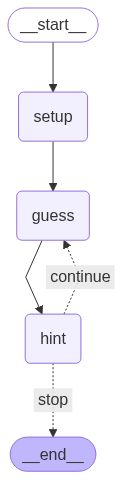

In [42]:
app

In [ ]:
initial_state = {
    "player_name": "tirth",
    "guesses": [],
    "attempts": 10,
    "lower_bound": 1,
    "upper_bound": 1000,
    "target": 69
}


In [46]:
result = app.invoke(initial_state)

Graph guess: 365
Graph guess: 220
Graph guess: 43
Graph guess: 122
Graph guess: 71
Graph guess: 64
Graph guess: 70
Graph guess: 69
Correct guess!
